In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.plain_qm import SchrodingerSystem

In [2]:
a = 1/2
N = 8
E_0 = 1/2

In [3]:
x_exact = np.linspace(-2.0, 2.0, 100)
x_pimc = np.linspace(-2.0, 2.0, 20)

# Harmonic oscillator

In the following program we will calculate the ground state energy the propagator of the harmonic oscillator by calulating the path integral
We will compare the results with the exact ones.

In [4]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [5]:
harmonic_oscillator = SchrodingerSystem(V=V_harmonic_oscillator, T=N*a, N=N)

In [6]:
propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact, ground_energy=E_0, ground_wavefunction=psi_ground)
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

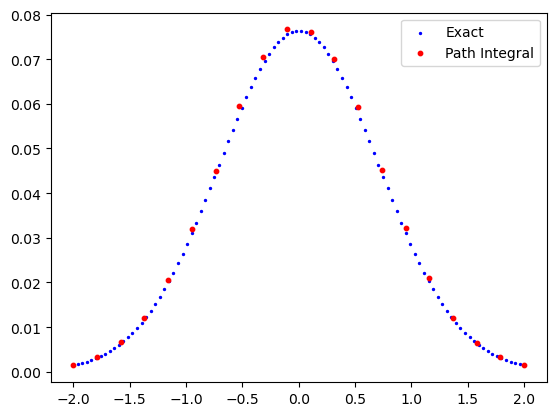

In [7]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.legend(['Exact', 'Path Integral'])
plt.show()

In [8]:
for result in propagators_pimc_results:
    print(result.Q)

0.45706559617026565
0.8791496367789379
0.27599964149351225
0.5915925677816043
0.5218822141158324
0.6695619590509871
0.1979276154934506
0.4930409000724769
0.035621286615014375
0.12351271741307701
0.44510927403802714
0.2763723998341415
0.5131580812384517
0.06181540844358689
0.6423850260577445
0.9421932680881302
0.059345369836964305
0.4557260880826546
0.13585254552596887
0.7566704351169203


If all Qs are greater than $0.01$, it means that all points are statistically significant. 

# Potential $x^4/2$

In [9]:
def V_x4(x: float):
    return x ** 4 / 2

In [10]:
x4_system = SchrodingerSystem(V=V_x4, T=4, N=8)

In [11]:
propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-4, upper_bound=4, neval=10000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Computing...
Took 0.04708552360534668


In [12]:
for result in propagators_pimc_results:
    print(result.Q)

0.7423959012558274
0.18382571611816134
0.26776949841421055
0.4572001860094247
0.6489366238536277
0.30629322646686563
0.2907261736672875
0.6558174661917843
0.19783829022889196
0.5641004629138155
0.05519796824370839
0.9350944173152895
0.8561825333585481
0.4299550291022849
0.4674482322501785
0.45469804595541863
0.4527378366328999
0.6262734965902279
0.7011881340760845
0.7502787257980961


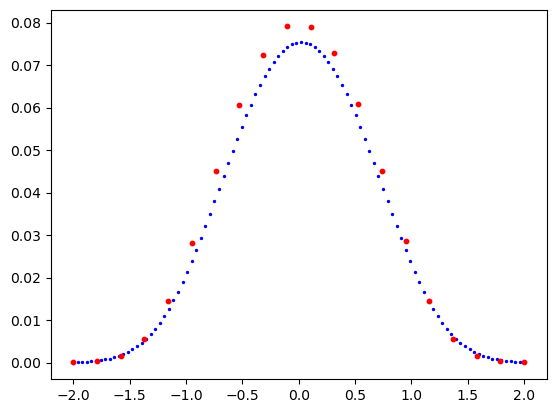

In [13]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()